<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bassignment%5D_XGBoost_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ensemble 모델

## [P.1] Gradient Boosting 모델

Gradient Boosting 알고리즘을 [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)를 통해 구현하고, `make_moons` 데이터셋에 대한 학습 결과 정리하기

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split  # divide train and test
from sklearn.datasets import make_moons # moons dataset

X, y = make_moons(n_samples=1000, noise=0.4) # add noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

score = gb_clf.score(X_test, y_test)
print('Score: %s' % (score))

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print('Acc: %s' % (acc))

Score: 0.86
Acc: 0.86


In [ ]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    # plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o")
    
    if show:
        plt.show()

In [ ]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(-3, 4, 100)
        x1 = np.linspace(-3, 4, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)
        
    
    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

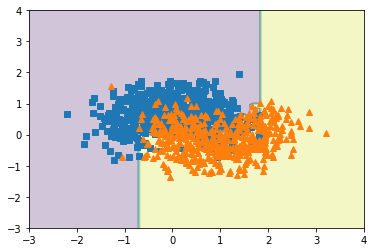

In [ ]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(gb_clf)

plt.show()

## [P.2] XGBoost 모델

XGBoost는 사이킷런 기반이긴 하지만, 패키지 자체를 따로 제공하기 때문에 클래스를 불러오는 곳이 다름    
[`XGBClassifier`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)를 이용해보고 argument를 다양하게 바꿔가며 성능 비교해보기

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)

X_train = X_train[:, 2:]
X_test = X_test[:, 2:]

xgb_clf = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
xgb_clf.fit(X_train, y_train)
# make predictions
y_pred = xgb_clf.predict(X_test)

print(xgb_clf.score(X_test, y_test))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))
print(xgb_clf.feature_importances_)

0.9666666666666667
0.9666666666666667
[0.23066032 0.7693397 ]


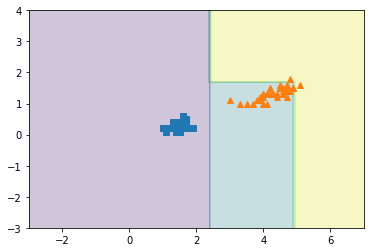

In [ ]:
plt.figure(figsize=(6, 4))

plot_dataset(X_train, y_train, False)
# plot_dataset(X_test, y_test, False)
plot_decision_boundary(xgb_clf, [[-3, 7], [-3, 4]])

plt.show()

In [ ]:
dict.keys(data)
data.feature_names[2:], xgb_clf.feature_importances_
for name, importance in zip(data.feature_names[2:], xgb_clf.feature_importances_):
  print('importance of %s is %s' % (name, importance))

importance of petal length (cm) is 0.23066032
importance of petal width (cm) is 0.7693397


Bagging tree의 장점은 각 피처들의 중요도를 계산해, 모델에 대한 설명가능성을 키워줄 수 있음    
이는 `feature_importances_` 메써드를 활용하면 쉽게 알 수 있음

## [P.3] LightGBM 모델

이번에는 또다른 Boosting 알고리즘인 [`LGBMClassifier`](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)를 활용해서 모델을 구현해보기    

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm_clf = LGBMClassifier(num_leaves=15, max_depth=3, learning_rate=0.5)

lgbm_clf.fit(X_train, y_train)

y_pred = lgbm_clf.predict(X_test)

print(accuracy_score(y_pred, y_test))

print(lgbm_clf.score(X_test, y_test))

0.805
0.805


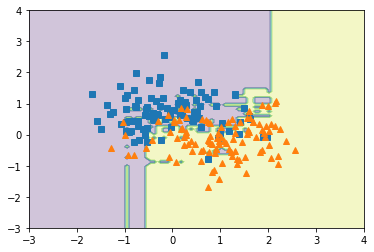

In [ ]:
plt.figure(figsize=(6, 4))

# plot_dataset(X_train, y_train, False)
# plot_decision_boundary(lgbm_clf, [[-3, 7], [-3, 4]])
plot_dataset(X_test, y_test, False)
plot_decision_boundary(lgbm_clf)

plt.show()